# Benuzerdefiniertes Widget

## Erforschen des Lorenz Systems der Differentialgleichungen

In diesem Notebook werden wir das Lorenz Systems der Differentialgleichungen erforschen:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

Das ist eines der klassischen Systeme der nicht-linearen Differentialgleichungen. Es zeigt die Bandbreite verschiedenen Verhaltens auf, wenn die Parameter ($\sigma$, $\beta$, $\rho$) verändert werden.

## Imports

Zuerst müssen wir einige Dinge von iPython importieren: [NumPy](http://www.numpy.org/), [Matplotlib](http://matplotlib.org/index.html) und [SciPy](http://www.scipy.org/).

In [3]:
%matplotlib inline

In [4]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [5]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

## Die Flugbahnen berechnen und das Ergebnis aufzeichnen

Wir definieren eine Funktion, die die Differentialgleichung integrieren und das Ergebnis aufzeichnen kann. Diese Funktion hat Parameter, die die Gleichung ($\sigma$, $\beta$, $\rho$), die numerische Integration(N, max_zeit) und die Visualisierung beeinflussen.

In [9]:
def lorenz_loesung(N=10, winkel=0.0, max_zeit=4.0, sigma=10.0, beta=8./3, rho=28.0):
    
    fig = plt.figure();
    ax = fig.add_axes([0,0,1,1], projection="3d");
    ax.axis("off")
    
    # Die Axenlimits vorbereiten
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_xlim((5, 55))
    
    def lorenz_ableitung(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        '''Berechne die Zeit-Ableitung eines Lorenz Systems'''
        x,y,z = x_y_z
        return [sigma * (y - x), x * (rho - z), x * y - beta * z]
    
    # Zufällige Startpunkte auswählen, die gleichverteilt zwischen -15 und 15 sind
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))
    
    # Nach den Flugbahnen lösen
    t = np.linspace(0, max_zeit, int(250*max_zeit))
    x_t = np.asarray([integrate.odeint(lorenz_ableitung, x0i, t) for x0i in x0])
    
    # Für jede Flugbahn eine andere Farbe wählen
    colors = plt.cm.jet(np.linspace(0,1,N));
    
    for i in range(N):
        x,y,z = x_t[i,:,:].T
        lines = ax.plot(x,y,z, "-", c=colors[i])
        _ = plt.setp(lines, linewidth=2);
        
    ax.view_init(30, winkel)
    _ = plt.show()
    
    return t, x_t

Lasst uns die Funktion nun einmal aufrufen, um das Ergebnis zu betrachten. Für diese Parameter sehen wir, dass die Flugbahnen um zwei Punkte schwingen, die Attraktoren.

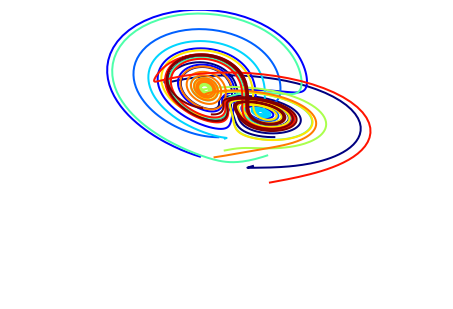

In [10]:
t, x_t = lorenz_loesung(winkel=0, N=10)

Durch Verwendung von iPython's `interactive` Funktion können wir untersuchen, wie sich die Flugbahnen verhalten, wenn wir die Parameter ändern.

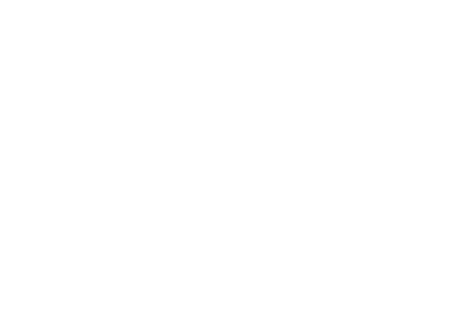

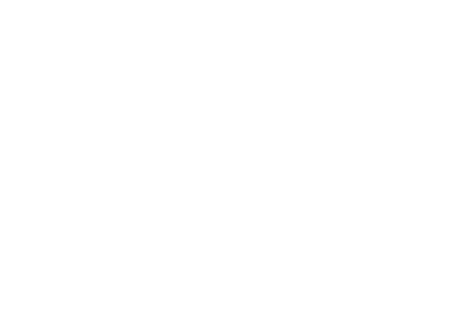

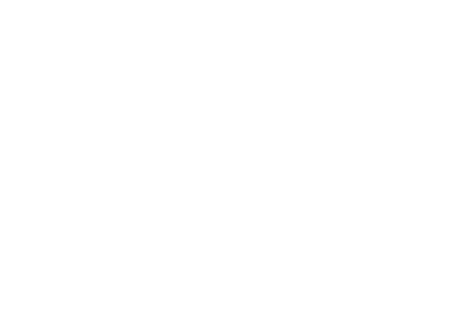

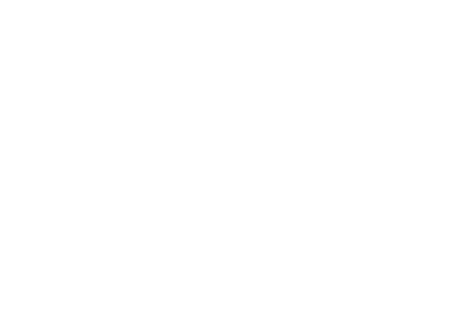

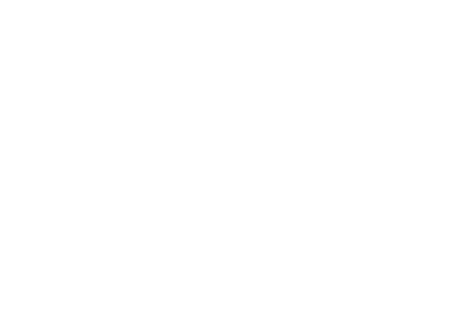

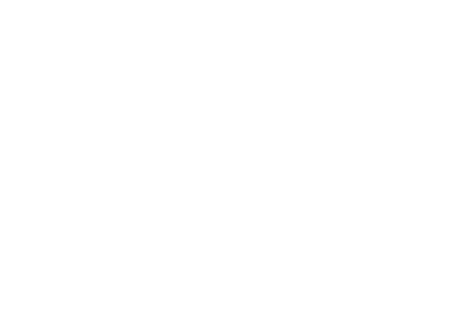

In [11]:
w = interactive(lorenz_loesung, winkel=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w);

Das Objekt das wir von `interactive` erhalten ist ein Widget Objekt und es hat attribute, die die aktuellen Ergebnisse beinhalten:

In [12]:
t, x_t = w.result

In [13]:
w.kwargs

{'N': 28,
 'beta': 1.33333,
 'max_zeit': 2.3,
 'rho': 19.6,
 'sigma': 25.1,
 'winkel': 0.0}

Nachdem wir mit dem System interagiert haben können wir das Ergebnis nutzen und weitere Berechnungen durchführen. In diesem Fall berechnen wir die durchschnittliche Position von $x$, $y$ und $z$.

In [14]:
xyz_avg = x_t.mean(axis=1)

In [15]:
xyz_avg.shape

(28, 3)

Durch Erstellung von Histogrammen der durchschnittlichen Positionen (entlang verschiedener Flugbahnen) sehen wir, dass im Schnitt die Flugbahn um die Attraktoren liegen.

## Schlusswort

Hoffentlich hat es euch gefallen, die Widgets in den Jupyter Notebooks kennenzulernen. Und eventuell habt ihr sogar damit begonnen, weiter Möglichkeiten der Widgets zu erkunden. Weiterhin viel Spaß dabei!